In [24]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [139]:
samples1 = [6,8,10,12]
samples2 = [8,10,12,30,50]

In [114]:
fun1_range = [0, 4.5]
fun2_range = [1/10, 1]

In [141]:
f1_xs = np.linspace(fun1_range[0], fun1_range[1], 50)
f2_xs = np.linspace(fun2_range[0], fun2_range[1], 100)

In [79]:
def f1(x): return x/(2+x**2)

In [80]:
def f2(x): return x * np.sin(np.pi/x)

In [ ]:
def cubic_interpolation(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

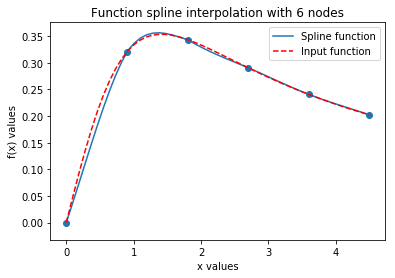

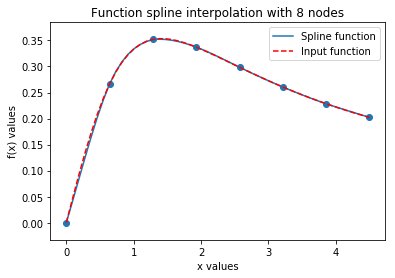

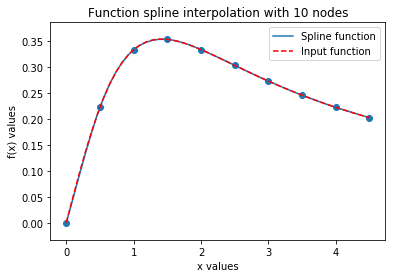

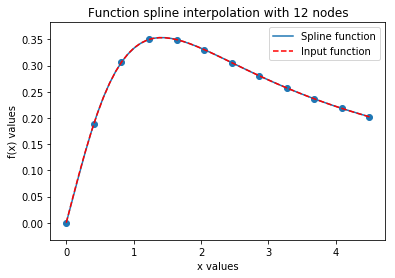

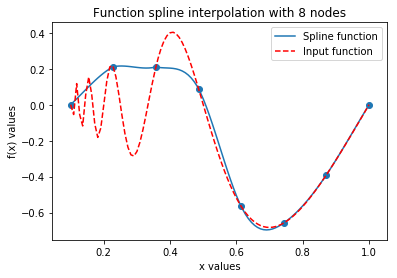

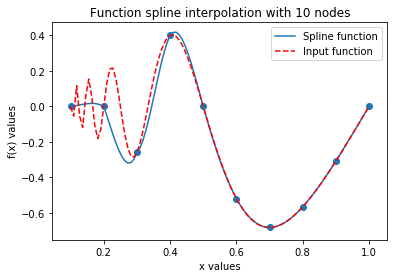

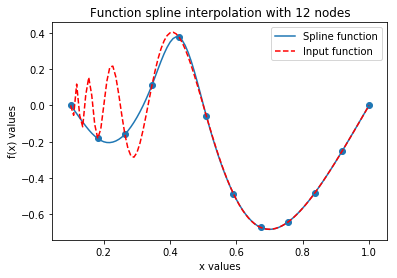

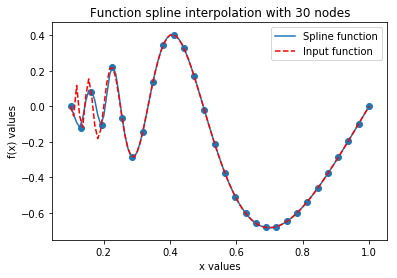

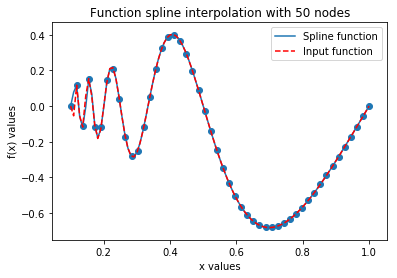

In [142]:
if __name__ == '__main__':
    for sample in samples1:
        x = np.linspace(fun1_range[0], fun1_range[1], sample)
        y = list(map(f1, x))
        plt.title('Function spline interpolation with ' + str(sample) + ' nodes')
        plt.xlabel('x values')
        plt.ylabel('f(x) values')
        plt.scatter(x, y)

        plt.plot(f1_xs, cubic_interpolation(f1_xs, x, y), label='Spline function')
        plt.plot(f1_xs, f1(f1_xs), 'y--', color='r', label='Input function')
        plt.legend()
        
        plt.savefig('spline_interpolation' + str(sample) + '.png')
        plt.show()
    
    for sample in samples2:
        x2 = np.linspace(fun2_range[0], fun2_range[1], sample)
        y2 = list(map(f2, x2))
        plt.title('Function spline interpolation with ' + str(sample) + ' nodes')
        plt.xlabel('x values')
        plt.ylabel('f(x) values')
        plt.scatter(x2, y2)

        plt.plot(f2_xs, cubic_interpolation(f2_xs, x2, y2), label='Spline function')
        plt.plot(f2_xs, f2(f2_xs), 'y--', color='r', label='Input function')
        plt.legend()
        
        plt.savefig('spline_interpolationf2' + str(sample) + '.png')
        plt.show()